In [1]:
import healpy as hp
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from glob import glob
from matplotlib import pyplot as plt

In [4]:
hitmap = hp.ma(hp.read_map("hitmap_Greenland_20_opening.fits"))

NSIDE = 128
ORDERING = RING in fits file


In [5]:
sampling_frequency = 30

In [6]:
# number of days
hitmap.sum()/sampling_frequency/3600/24

29.78728935185185

In [7]:
# million hits
hitmap.sum()/1e6

77.208653999999996

In [8]:
# expected million hits
sampling_frequency*3600*24*31/1e6

80.352

In [9]:
pixarea_sqdeg = hp.nside2pixarea(128, degrees=True)

Sensitivity for 100 detectors: $32\, \mu K \sqrt{s}$ 

In [10]:
sensitivity = 32

In [11]:
sensitivity_map = sensitivity / np.sqrt(hitmap / sampling_frequency)

/home/zonca/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [12]:
sensitivity_map_sqdeg = sensitivity_map / pixarea_sqdeg

In [13]:
cmap = plt.get_cmap("gray")

In [14]:
cmap.set_under("white")

In [15]:
hp.mollview?

In [16]:
xsize= 1000
ysize= xsize/2

In [17]:
s[np.isinf(s)]=None

NameError: name 's' is not defined

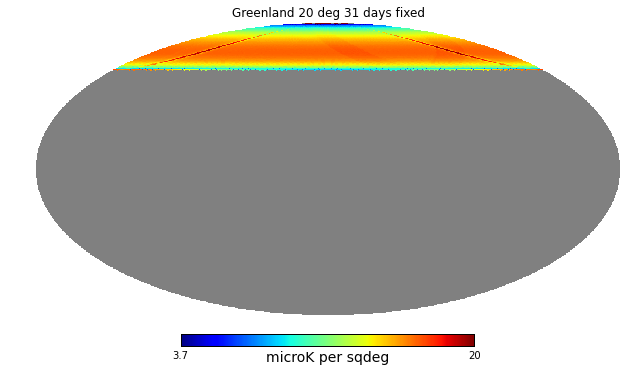

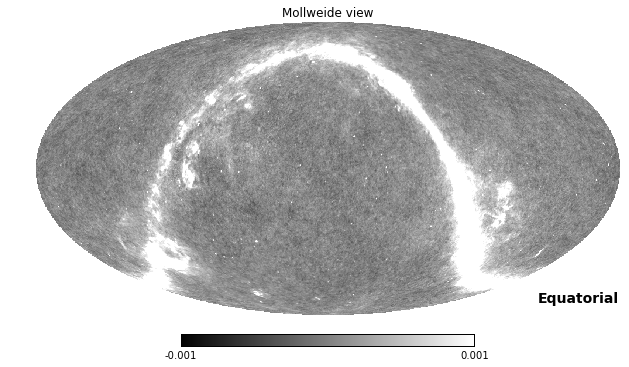

In [68]:
s = hp.mollview(sensitivity_map_sqdeg, xsize=xsize,min=3.7, max=20, unit="microK per sqdeg", title="Greenland 20 deg 31 days fixed", return_projected_map=True)

p30proj = hp.mollview(planck30, min=-1e-3, max=1e-3, cmap=cmap, coord=("G","C"), return_projected_map=True, xsize=xsize)

In [41]:
s.mask |= np.isnan(s)

In [42]:
s.fill_value=0

In [43]:
s.filled().max()

417.66363751641376

In [44]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
%autoreload 2

In [46]:
pi=np.pi

In [47]:
p30proj[np.isinf(p30proj)]=np.nan

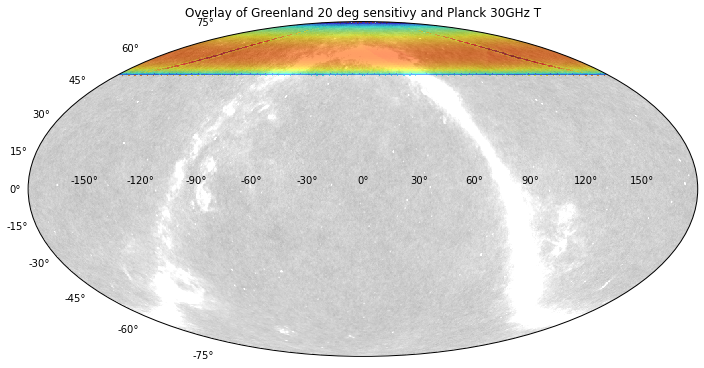

In [69]:
longitude = np.radians(np.linspace(-180, 180, xsize))
latitude = np.radians(np.linspace(-90, 90, ysize))
fig = plt.figure(figsize=(12, 12/(3./2.)))
# matplotlib is doing the mollveide projection
ax = fig.add_subplot(111,projection='mollweide')
#image = plt.pcolormesh(longitude[::-1], latitude, s, vmin=3.7, vmax=20, rasterized=True)

#image = plt.pcolormesh(longitude[::-1], latitude, p30proj, vmin=-1e-3, vmax=1e-3, rasterized=True, cmap=cmap, alpha=.3)
image = plt.imshow(s, vmin=3.7, vmax=20, aspect=0.5,  interpolation="nearest",origin="lower", extent=(-pi,pi,-pi/2,pi/2))
image = plt.imshow(p30proj, alpha=.4, cmap=cmap, vmin=-1e-3, vmax=1e-3, aspect=0.5,  interpolation="nearest",origin="lower", extent=(-pi,pi,-pi/2,pi/2))

plt.title("Overlay of Greenland 20 deg sensitivy and Planck 30GHz T")
# remove tick labels
#ax.xaxis.set_ticklabels([])
#ax.yaxis.set_ticklabels([])
# remove grid
#ax.xaxis.set_ticks([])
#ax.yaxis.set_ticks([])

In [49]:
p30proj

masked_array(data =
 [[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]],
             mask =
 False,
       fill_value = -1.6375e+30)

In [167]:
s.compressed()

array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

In [95]:
hp.mollview?

In [66]:
planck30 = hp.read_map("./LFI_SkyMap_030_1024_R2.00_full.fits")

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


In [60]:
p=(hp.read_map("./LFI_SkyMap_030_1024_R2.00_full.fits",1)**2 + hp.read_map("./LFI_SkyMap_030_1024_R2.00_full.fits",2))

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


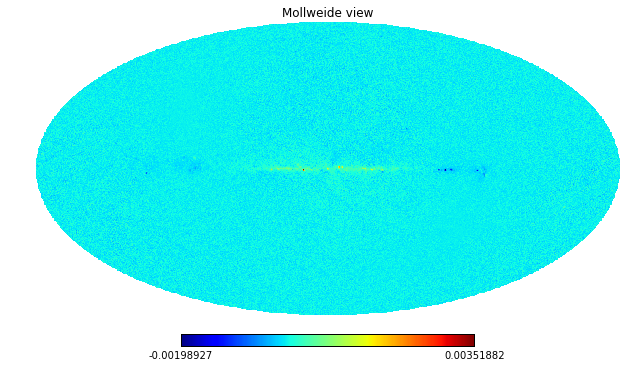

In [61]:
hp.mollview(p)

In [54]:
from astropy.io import fits

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


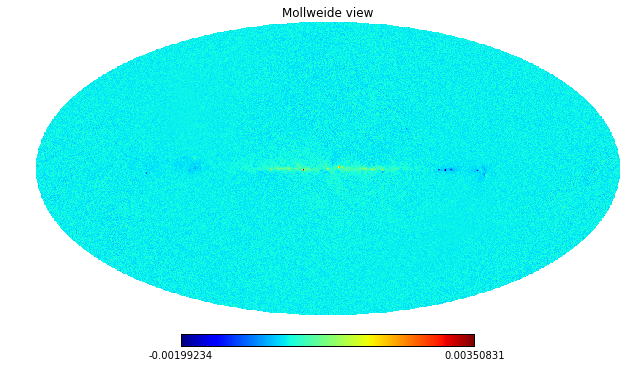

In [57]:
hp.mollview(hp.read_map("LFI_SkyMap_030_1024_R2.00_full.fits",2))

In [62]:
planck30 = hp.smoothing(p, fwhm=np.radians(1))

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [63]:
planck30 = p